In [1]:
from core.preprocessing import make_small_train, make_small_dev
from core.problems import FunctionalRegression
import numpy as np
import pandas as pd
df = pd.read_pickle('data/master_dataset.pkl').fillna(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', palette='colorblind', context='talk')

/Users/bennetmeyers/.virtualenvs/sc/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plot_trends_and_total(df, start=None, stop=None):
    if start is None:
        start = df.index[0]
    if stop is None:
        stop = df.index[-1]
    cols = df.columns
    fig, axes = plt.subplots(nrows=2, figsize=(12,10), sharex=True)
    df.loc[start:stop].plot(y=cols[:-1], legend=False, linewidth=1, ax=axes[0])
    df.loc[start:stop].plot(y=cols[-1], linewidth=1, ax=axes[1])

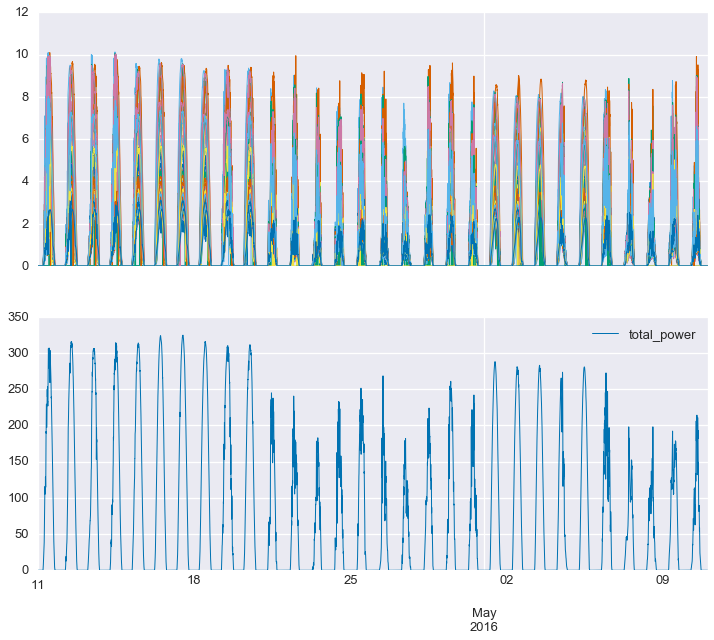

In [16]:
train_df = make_small_train(df, 'combined')
plot_trends_and_total(train_df)

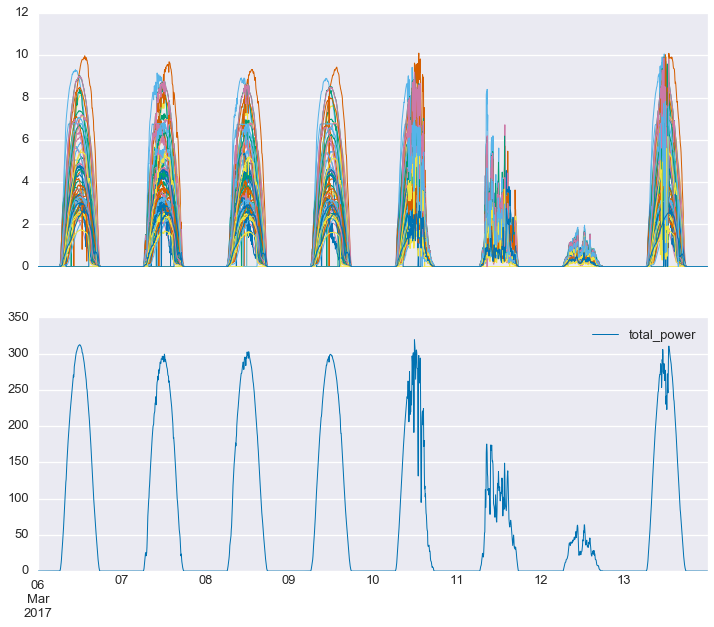

In [4]:
test_df = make_small_dev(df)
plot_trends_and_total(test_df)

In [17]:
funcreg = FunctionalRegression(train_df, test_df)

In [18]:
funcreg.make_forecasts(neighborhood=50)
funcreg.calc_mse()

1817.8753909849934

(24812640.0, 24816958.125)

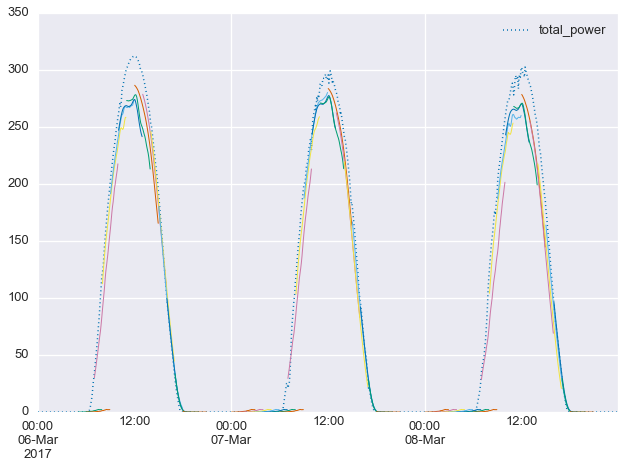

In [19]:
funcreg.plot_test()
ax = plt.gca()
lim = ax.get_xlim()
chunk = (lim[1] - lim[0])/8.
start = lim[0] + 0*chunk
end = lim[0] + 3*chunk
ax.set_xlim(start, end)

In [14]:
ns = [1, 2, 5, 10, 20, 30, 40, 50, 75, 100]
param_search = pd.DataFrame(index=ns, columns=['mse'])
for n in ns:
    funcreg.make_forecasts(neighborhood=n)
    param_search.loc[n] = funcreg.calc_mse()

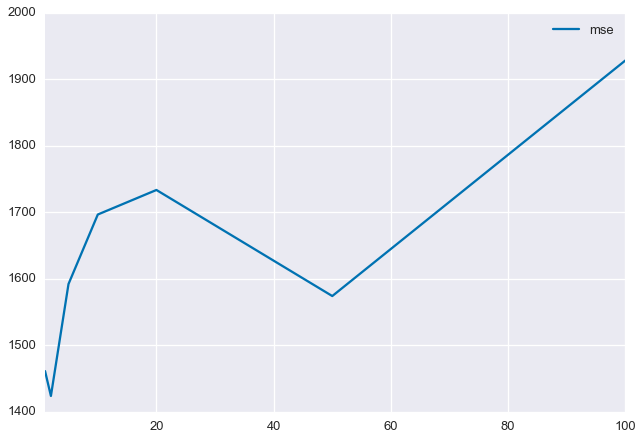

In [15]:
param_search.plot()

In [10]:
funcreg.test_features.shape

(184, 4380)

In [11]:
funcreg.neighborhoods

array([[   0, 1402, 1401, ..., 1154, 1153, 1152],
       [   0, 1402, 1401, ..., 1154, 1153, 1152],
       [  20,  308,  596, ..., 1754, 1756, 1458],
       ..., 
       [1300, 1301, 1299, ...,  155,  142, 1307],
       [1313, 1312, 1314, ..., 2466,  167,  444],
       [1325, 1326,  462, ...,  754,  170,  178]])

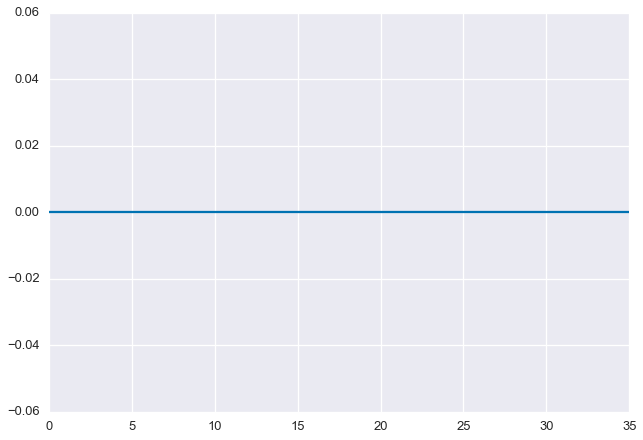

In [12]:
plt.plot(funcreg.train_response[1399])